<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

<span style="color: red;">**THE FOLLOWING PRESENTS CODES THAT ARE MOSTLY DIFFERENT FROM THE ORIGINAL CODE IN THE CHAPTER.**</span>

# Web Integration

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## Web Basics

### ftplib

### httplib

In [2]:
import http
import http.client

In [3]:
http = http.client.HTTPConnection('hilpisch.com')

In [4]:
http.request('GET', '/index.htm')

In [5]:
resp = http.getresponse()

In [6]:
resp.status, resp.reason

(200, 'OK')

In [7]:
content = resp.read()
content[:100]
  # first 100 characters of the file

b'<!doctype html>\n<html lang="en">\n\n\t<head>\n\t\t<meta charset="utf-8">\n\n\t\t<title>Dr. Yves J. Hilpisch \xe2\x80'

In [8]:
index = content.find(b' E ')
index

2763

In [9]:
content[index:index + 29]

b' E contact [at] dyjh [dot] de'

In [10]:
http.close()

### urllib

In [11]:
import urllib.request

In [12]:
url = 'http://hilpisch.com/tr_eikon_eod_data.csv'

In [13]:
connect = urllib.request.urlopen(url)

In [14]:
data = connect.read()

In [15]:
print(data[:1000])

b'Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n2010-01-07,30.082827060000003,30.452,20.6,130.0,177.67,114.19,1141.69,19.06,1.4318,1131.9,49.1,110.82\n2010-01-08,30.28282686,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.1,49.84,111.37\n2010-01-11,30.015684270000005,30.27,20.95,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.6,50.17,112.85\n2010-01-12,29.674256040000003,30.07,20.608,127.35,167.82,113.66,1136.22,18.25,1.4494,1127.3,48.35,110.49\n2010-01-13,30.092827050000004,30.35,20.96,129.11,169.07,114.62,1145.68,17.85,1.451,1138.4,48.86,111.54\n2010-01-14,29.918541510000004,30.96,21.48,127.35,168.53,114.93,1148.46,17.63,1.4502,1142.85,48.6,112.03\n

In [16]:
path = '/Users/yves/Documents/Temp/data/'

In [17]:
urllib.request.urlretrieve(url, path + 'eod_data.csv')

('/Users/yves/Documents/Temp/data/eod_data.csv',
 <http.client.HTTPMessage at 0x10735d278>)

In [18]:
csv = open(path + 'eod_data.csv', 'r')
csv.readlines()[:5]

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n',
 '2010-01-07,30.082827060000003,30.452,20.6,130.0,177.67,114.19,1141.69,19.06,1.4318,1131.9,49.1,110.82\n']

In [19]:
!rm -f ./data/*

## Web Plotting

### Static Plots

In [20]:
import numpy as np
import pandas as pd
%matplotlib inline

In [21]:
url = 'http://hilpisch.com/tr_eikon_eod_data.csv'
data = pd.read_csv(url, parse_dates=['Date'])

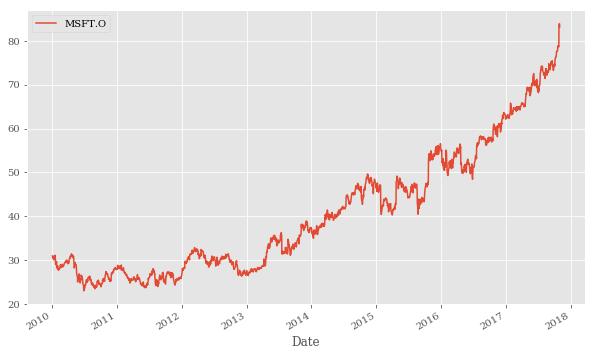

In [22]:
data.plot(x='Date', y='MSFT.O', figsize=(10, 6));
# tag: microsoft
# title: Historical stock prices for Microsoft since January 2010

### Interactive Plots

**REMARK**: The original version used Bokeh for Web plotting. Plotly seems to be the more easy and intuitive way for generating interactive D3.js Web plots.

In [23]:
import pandas as pd
import cufflinks as cf

In [24]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [25]:
# direct plotting with Cufflinks within the notebook
iplot(data.set_index('Date')['MSFT.O'].iplot(asFigure=True))

### Real-Time Plots

#### Real-Time FX Data

#### Real-Time Stock Price Quotes

## Rapid Web Applications

### Traders' Chat Room

### Data Modeling

### The Python Code

#### Imports and Database Preliminaries

#### Core Functionality

### Templating

In [26]:
'%d, %d, %d' % (1, 2, 3)

'1, 2, 3'

In [27]:
'{}, {}, {}'.format(1, 2, 3)

'1, 2, 3'

In [28]:
'{}, {}, {}'.format(*'123')

'1, 2, 3'

In [29]:
templ = '''<!doctype html>
  Just print out <b>numbers</b> provided to the template.
  <br><br>
  {% for number in numbers %}
    {{ number }}
  {% endfor %}
'''

In [30]:
from jinja2 import Template

In [31]:
t = Template(templ)

In [32]:
html = t.render(numbers=range(5))

In [33]:
html

'<!doctype html>\n  Just print out <b>numbers</b> provided to the template.\n  <br><br>\n  \n    0\n  \n    1\n  \n    2\n  \n    3\n  \n    4\n  '

In [34]:
from IPython.display import HTML
HTML(html)

### Styling

In [35]:
import os
for path, dirs, files in os.walk('../python36/tradechat'):
  print(path)
  for f in files:
    print(f)

../python36/tradechat
tables.sql
tradechat.db
tradechat.py
../python36/tradechat/static
style.css
../python36/tradechat/templates
layout.html
login.html
register.html
show_entries.html


## Web Services

### The Financial Model

### The Implementation

In [36]:
import sys
import requests
sys.path.append('../python36/volservice')
  # adjust if necessary to your path

In [37]:
from werkzeug.wrappers import Request, Response 

In [38]:
from vol_pricing_service import get_option_value

In [39]:
def application(environ, start_response):
    request = Request(environ)
      # wrap environ in new object
    text = get_option_value(request.args)
      # provide all paramters of the call to function
      # get back either error message or option value
    response = Response(text, mimetype='text/html')
      # generate response object based on the returned text
    return response(environ, start_response)

In [40]:
import requests
import numpy as np
url = 'http://localhost:4000/'

Start the service on the shell in the appropriate folder:

    $ python vol_pricing.py

In [41]:
print(requests.get(url).text)

Missing parameter V0 (current volatility level)
Missing parameter kappa (mean reversion factor)
Missing parameter theta (long-run mean of volatility)
Missing parameter sigma (volatility of volatility)
Missing parameter zeta (factor of the expected volatility risk premium)
Missing parameter T (time horizon in years)
Missing parameter r (risk-free interest rate)
Missing parameter K (strike)



In [42]:
urlpara = url + 'application?V0=%s&kappa=%s&theta=%s&sigma=%s&zeta=%s'
urlpara += '&T=%s&r=%s&K=%s'

In [43]:
urlval = urlpara % (25, 2.0, 20, 1.0, 0.0, 1.5, 0.02, 22.5)
urlval

'http://localhost:4000/application?V0=25&kappa=2.0&theta=20&sigma=1.0&zeta=0.0&T=1.5&r=0.02&K=22.5'

In [44]:
print(requests.get(urlval).text)

0.202937705934


In [45]:
%%time
urlpara = 'http://localhost:4000/application?V0=25&kappa=2.0'
urlpara += '&theta=25&sigma=1.0&zeta=0.0&T=1&r=0.02&K=%s'
strikes = np.linspace(20, 30, 50)
results = []
for K in strikes:
     results.append(float(requests.get(urlpara % K).text))
results = np.array(results)

CPU times: user 196 ms, sys: 33.2 ms, total: 229 ms
Wall time: 441 ms


In [46]:
results

array([ 4.91296701,  4.71661296,  4.52120153,  4.32692516,  4.1339945 ,
        3.94264561,  3.75313813,  3.56575972,  3.38079846,  3.19858765,
        3.01946028,  2.8437621 ,  2.67184576,  2.50406508,  2.34078693,
        2.18230495,  2.02898213,  1.88111287,  1.738968  ,  1.60280064,
        1.47281111,  1.34917004,  1.23204859,  1.12141092,  1.01739405,
        0.9199686 ,  0.82907686,  0.74462353,  0.66647327,  0.59445387,
        0.52843174,  0.46798166,  0.41300694,  0.36319553,  0.31824647,
        0.27785656,  0.24171678,  0.20951651,  0.18094732,  0.1557064 ,
        0.1334996 ,  0.11414975,  0.09710449,  0.08234678,  0.06958767,
        0.05859317,  0.04915788,  0.04109348,  0.03422854,  0.02840802])

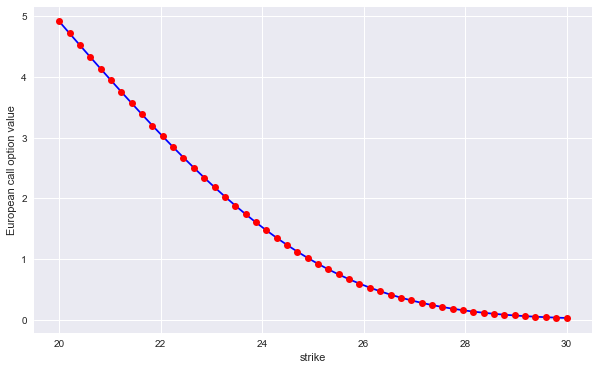

In [47]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(strikes, results, 'b')
plt.plot(strikes, results, 'ro')
plt.grid(True)
plt.xlabel('strike')
plt.ylabel('European call option value');

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>